In [1]:
from multi_arm import MultiArmedBanditEnv
from gymnasium import Space, Env
import numpy as np

probs = np.random.random(10)
env: MultiArmedBanditEnv = MultiArmedBanditEnv(probabilities=probs, seed=42)
obs: int = env.reset()
done: bool = False
total_reward: int = 0

print('Multi-armed state', env.probabilities)
while not done:
    action: int = env.action_space.sample()  # Replace this with your strategy
    obs, reward, done, info = env.step(action)
    total_reward += reward
    print(f"Action: {action}, Reward: {reward}, Total Reward: {total_reward}")

env.close()

Multi-armed state [0.20028044 0.24686765 0.4102863  0.19001199 0.41457487 0.51186901
 0.52463467 0.61751082 0.33076831 0.54244234]
Action: 0, Reward: 0, Total Reward: 0
Action: 6, Reward: 1, Total Reward: 1
Action: 3, Reward: 1, Total Reward: 2
Action: 9, Reward: 0, Total Reward: 2
Action: 7, Reward: 1, Total Reward: 3
Action: 0, Reward: 1, Total Reward: 4
Action: 7, Reward: 0, Total Reward: 4
Action: 3, Reward: 0, Total Reward: 4
Action: 4, Reward: 0, Total Reward: 4
Action: 2, Reward: 0, Total Reward: 4
Action: 0, Reward: 0, Total Reward: 4
Action: 4, Reward: 1, Total Reward: 5
Action: 5, Reward: 0, Total Reward: 5
Action: 1, Reward: 1, Total Reward: 6
Action: 4, Reward: 0, Total Reward: 6
Action: 7, Reward: 1, Total Reward: 7
Action: 6, Reward: 0, Total Reward: 7
Action: 2, Reward: 0, Total Reward: 7
Action: 6, Reward: 0, Total Reward: 7
Action: 9, Reward: 0, Total Reward: 7
Action: 2, Reward: 1, Total Reward: 8
Action: 2, Reward: 0, Total Reward: 8
Action: 2, Reward: 1, Total Rewar

In [2]:
class RandomAgent:
    def __init__(self, action_space: Space) -> None:
        self.action_space = action_space

    def act(self):
        return self.action_space.sample()
    
    def update_state(self, action: int, reward: int) -> None:
        return
    
    def reset(self) -> None:
        return
    
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}"
    
class ExploreAndGreed:
    def __init__(self, action_space: Space, exploration_prob: float = 0.1) -> None:
        assert 0 <= exploration_prob <= 1, f'"eploration_prob" should be in [0, 1] range, current value = {exploration_prob}'
        self.exploration_prob = exploration_prob
        self.arm_num = action_space.n
        self.arm_count = np.zeros(self.arm_num)
        self.arm_reward = np.zeros(self.arm_num) 
    
    def act(self) -> int:
        # act based on current internal state

        # exploitation step
        if  np.random.random() > self.exploration_prob:
            return np.argmax(self.arm_reward / (self.arm_count + 1e-5))
        else: # exploration step
            return np.random.choice(self.arm_num)
    
    def update_state(self, action: int, reward: int) -> None:
        # update stats based on observed reward
        self.arm_count[action] += 1
        self.arm_reward[action] += reward
    
    def reset(self) -> None:
        self.arm_count = np.zeros(self.arm_num)
        self.arm_reward = np.zeros(self.arm_num) 
    
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(exploration_prob={self.exploration_prob})"


In [3]:
print('Multi-armed state', env.probabilities)
agent = ExploreAndGreed(env.action_space)
obs: int = env.reset()
done: bool = False
total_reward: int = 0
while not done:
    action: int = agent.act()  # Replace this with your strategy
    obs, reward, done, info = env.step(action)
    agent.update_state(action, reward)
    total_reward += reward
    print(f"Action: {action}, Reward: {reward}, Total Reward: {total_reward}")

Multi-armed state [0.20028044 0.24686765 0.4102863  0.19001199 0.41457487 0.51186901
 0.52463467 0.61751082 0.33076831 0.54244234]
Action: 0, Reward: 0, Total Reward: 0
Action: 0, Reward: 0, Total Reward: 0
Action: 0, Reward: 0, Total Reward: 0
Action: 0, Reward: 0, Total Reward: 0
Action: 0, Reward: 0, Total Reward: 0
Action: 0, Reward: 0, Total Reward: 0
Action: 0, Reward: 1, Total Reward: 1
Action: 0, Reward: 0, Total Reward: 1
Action: 0, Reward: 0, Total Reward: 1
Action: 0, Reward: 0, Total Reward: 1
Action: 0, Reward: 0, Total Reward: 1
Action: 0, Reward: 0, Total Reward: 1
Action: 1, Reward: 0, Total Reward: 1
Action: 0, Reward: 1, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 0, Total Reward: 2
Action: 0, Reward: 1, Total Rewar

## Bernoulli testbed

In [4]:
from typing import List, Type
from gymnasium import Env
import matplotlib.pyplot as plt
from collections import defaultdict

# Define other agent classes here with an `act` method.
def run_experiment(env: Env, agent) -> np.ndarray[float]:
    # What if envs are different lengths?
    rewards = []
    is_opt_action = []
    _ = env.reset()
    agent.reset()
    done = False
    total_reward = 0
    while not done:
        action = agent.act()
        opt_action = env.get_optimal_action()
        _, reward, done, _ = env.step(action)
        agent.update_state(action, reward)
        total_reward += reward
        rewards.append(total_reward)
        is_opt_action.append(int(action == opt_action))
    return np.array(rewards), np.array(is_opt_action)

def average_results(all_rewards: List[np.ndarray]) -> np.ndarray:
    summed_rewards = np.sum(np.array(all_rewards), axis=0)
    return summed_rewards / len(all_rewards)

# Experiment setup
num_experiments = 100
num_arms = 10

agents = [RandomAgent, ExploreAndGreed, ExploreAndGreed]
agents_kwargs = [
    {},
    {"exploration_prob": 0.1},
    {"exploration_prob": 0.2}
]
agent_rewards = defaultdict(list)
agent_opt_action = defaultdict(list)

for exp in range(num_experiments):
    settings = np.random.random(num_arms)
    env = MultiArmedBanditEnv(probabilities=settings, max_steps=1000)
    for Agent, kwargs in zip(agents, agents_kwargs):
        agent = Agent(env.action_space, **kwargs)
        rewards, is_opt_action = run_experiment(env, agent)
        agent_rewards[str(agent)].append(rewards)
        agent_opt_action[str(agent)].append(is_opt_action)

# Average the results
average_agent_rewards = {agent: average_results(rewards) 
                         for agent, rewards in agent_rewards.items()}
average_agent_opt_action = {agent: average_results(opt_action) 
                         for agent, opt_action in agent_opt_action.items()}



In [5]:
print(agent)

ExploreAndGreed(exploration_prob=0.2)


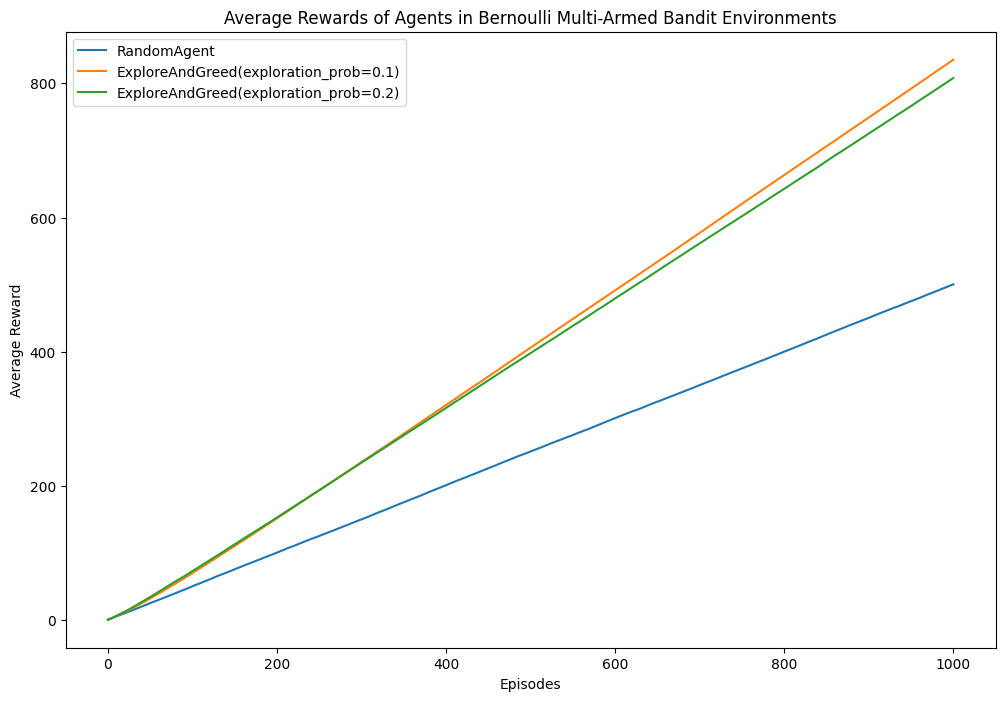

In [6]:
plt.figure(figsize=(12, 8))
for agent_name, rewards in average_agent_rewards.items():
    plt.plot(rewards, label=agent_name)

plt.title('Average Rewards of Agents in Bernoulli Multi-Armed Bandit Environments')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

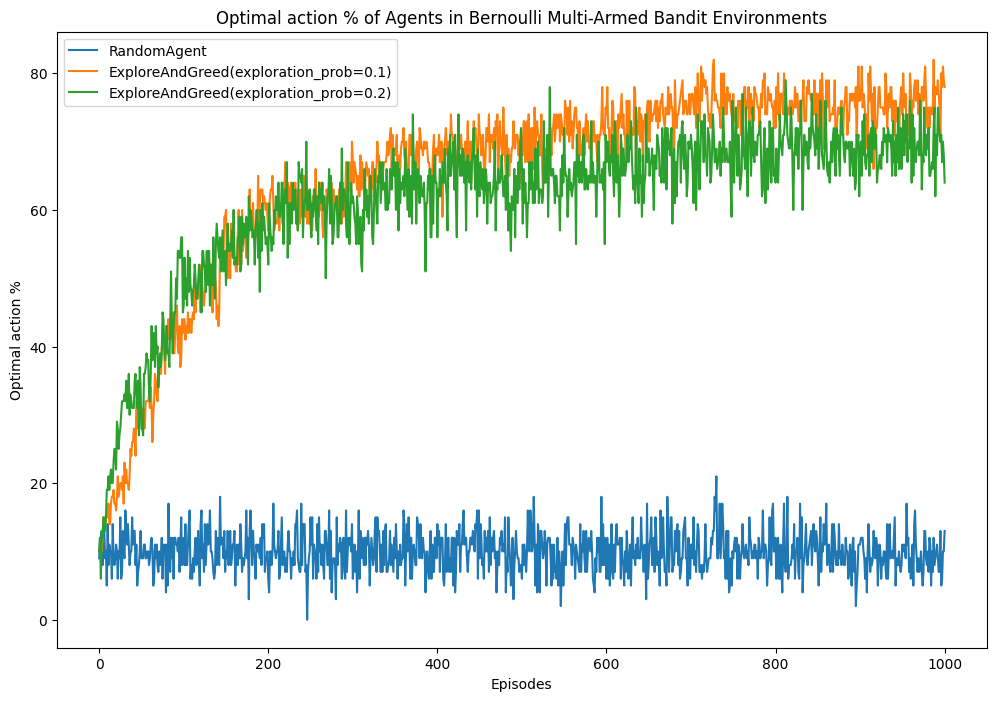

In [7]:
plt.figure(figsize=(12, 8))
for agent_name, opt_action in average_agent_opt_action.items():
    plt.plot(opt_action * 100, label=agent_name)

plt.title('Optimal action % of Agents in Bernoulli Multi-Armed Bandit Environments')
plt.xlabel('Episodes')
plt.ylabel('Optimal action %')
plt.legend()
plt.show()

In [8]:
average_agent_opt_action

{'RandomAgent': array([0.09, 0.12, 0.12, ..., 0.1 , 0.1 , 0.13]),
 'ExploreAndGreed(exploration_prob=0.1)': array([0.1 , 0.1 , 0.11, ..., 0.81, 0.79, 0.78]),
 'ExploreAndGreed(exploration_prob=0.2)': array([0.1 , 0.12, 0.06, ..., 0.7 , 0.68, 0.64])}

## Profiling

In [9]:
import cProfile
import pstats

In [10]:
def main():
    num_experiments = 1000
    num_arms = 10

    agents = [RandomAgent, ExploreAndGreed, ExploreAndGreed]
    agents_kwargs = [
        {},
        {"exploration_prob": 0.1},
        {"exploration_prob": 0.2}
    ]
    agent_rewards = defaultdict(list)
    agent_opt_action = defaultdict(list)

    for exp in range(num_experiments):
        settings = np.random.random(num_arms)
        env = MultiArmedBanditEnv(probabilities=settings, max_steps=1000)
        for Agent, kwargs in zip(agents, agents_kwargs):
            agent = Agent(env.action_space, **kwargs)
            rewards, is_opt_action = run_experiment(env, agent)
            agent_rewards[str(agent)].append(rewards)
            agent_opt_action[str(agent)].append(is_opt_action)

cProfile.run('main()', 'profile_stats')

In [11]:
p = pstats.Stats('profile_stats')
p.sort_stats('cumulative').print_stats(20)  # Adjust the number to view more or fewer lines


Tue Dec  5 21:34:22 2023    profile_stats

         64987528 function calls in 50.945 seconds

   Ordered by: cumulative time
   List reduced from 67 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   50.945   50.945 {built-in method builtins.exec}
        1    0.003    0.003   50.945   50.945 <string>:1(<module>)
        1    0.050    0.050   50.942   50.942 C:\Users\Stepan\AppData\Local\Temp\ipykernel_28896\1030196938.py:1(main)
     3000    6.176    0.002   50.742    0.017 C:\Users\Stepan\AppData\Local\Temp\ipykernel_28896\80640927.py:7(run_experiment)
  3003000    4.203    0.000   20.528    0.000 c:\Users\Stepan\Documents\GitHub\Multi-armed-bandit-research\multi_arm.py:28(step)
  2002000    6.308    0.000   17.237    0.000 C:\Users\Stepan\AppData\Local\Temp\ipykernel_28896\1356175661.py:25(act)
  3003000    5.864    0.000   12.613    0.000 c:\Users\Stepan\Documents\GitHub\Multi-armed-bandit-research\.